In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# Note add data set in data folder
train_path = "data/mnist_train.csv"
data = pd.read_csv(train_path)

In [3]:
# Separate labels and features
Y = torch.tensor(data.iloc[:, 0].values, dtype=torch.long)
X = torch.tensor(data.iloc[:, 1:].values, dtype=torch.float32)

# Normalize (important!)
X = X / 255.0

In [4]:
class MNISTDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


In [5]:
# DataLoader (batching + shuffling)

dataset = MNISTDataset(X, Y)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)


In [6]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [7]:
# Training Setup
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [8]:
# training loop
epochs = 5

for epoch in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()

        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == Y_batch).sum().item()
        total += Y_batch.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f}")


Epoch 1 | Loss: 1189.5993 | Accuracy: 0.6758
Epoch 2 | Loss: 501.7454 | Accuracy: 0.8640
Epoch 3 | Loss: 396.1240 | Accuracy: 0.8848
Epoch 4 | Loss: 355.9076 | Accuracy: 0.8945
Epoch 5 | Loss: 334.1964 | Accuracy: 0.8999


In [9]:
val_index = 560
model.eval()

with torch.no_grad():
    sample = X[val_index].view(1, -1)
    pred = torch.argmax(model(sample), dim=1).item()

print("Predicted label:", pred)
print("Actual label:", Y[val_index].item())


Predicted label: 7
Actual label: 7


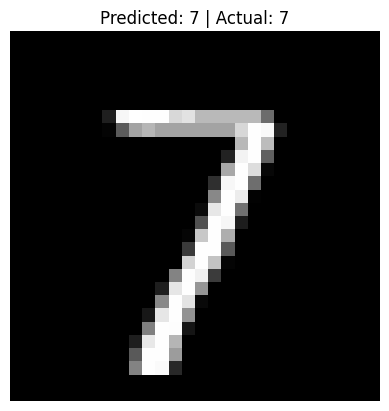

In [10]:
val_index = 560
model.eval()

with torch.no_grad():
    sample = X[val_index].view(1, -1)
    output = model(sample)
    pred = torch.argmax(output, dim=1).item()

# Plot image
image = X[val_index].view(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Predicted: {pred} | Actual: {Y[val_index].item()}")
plt.axis("off")
plt.show()

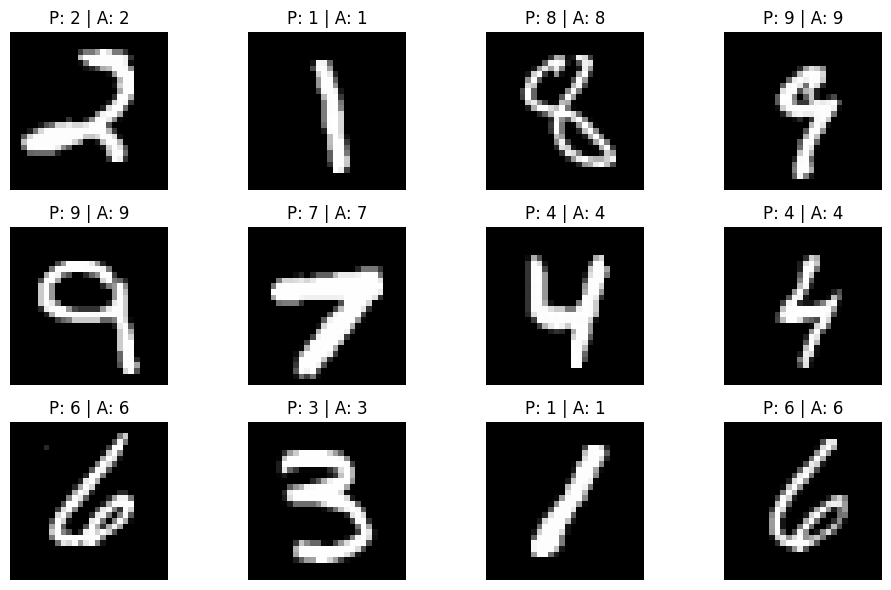

In [11]:
import random

model.eval()
fig, axes = plt.subplots(3, 4, figsize=(10, 6))
indices = random.sample(range(len(X)), 12)

with torch.no_grad():
    for ax, idx in zip(axes.flatten(), indices):
        img = X[idx].view(28, 28)
        label = Y[idx].item()
        pred = torch.argmax(model(X[idx].view(1, -1)), dim=1).item()

        ax.imshow(img, cmap="gray")
        ax.set_title(f"P: {pred} | A: {label}")
        ax.axis("off")

plt.tight_layout()
plt.show()


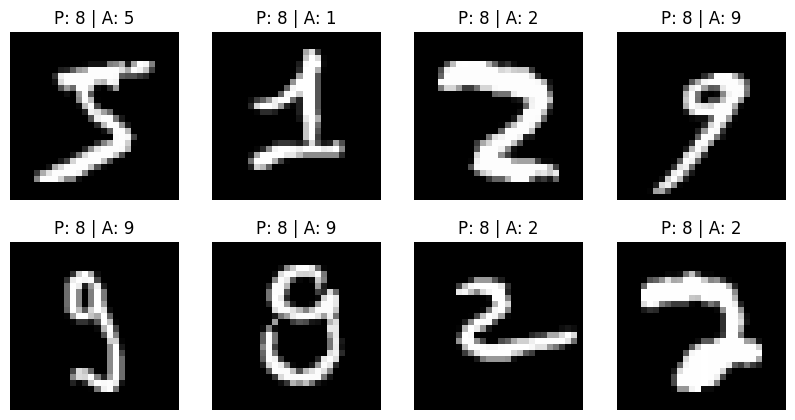

In [12]:
wrong = []

model.eval()
with torch.no_grad():
    for i in range(len(X)):
        pred = torch.argmax(model(X[i].view(1, -1)), dim=1).item()
        if pred != Y[i].item():
            wrong.append(i)

# Plot first 8 mistakes
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for ax, idx in zip(axes.flatten(), wrong[:8]):
    ax.imshow(X[idx].view(28, 28), cmap="gray")
    ax.set_title(f"P: {pred} | A: {Y[idx].item()}")
    ax.axis("off")

plt.show()
